<a href="https://colab.research.google.com/github/9-coding/PyTorch/blob/main/Lecture-Deep_Learning/03-multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

# Define parameters: W - weight , b - bias
# requires_grad: backpropagation을 허용할 것인가.
def weight_bias_reset():
  W = torch.zeros([4,1], requires_grad = True)
  b = torch.zeros(1, requires_grad = True)
  return W, b

x_train = torch.FloatTensor([[3.8, 700, 80, 50],
                             [3.2, 650, 90, 30],
                             [3.7, 820, 70, 40],
                             [4.2, 830, 50, 70],
                             [2.6, 550, 90, 60],
                             [3.4, 910, 30, 40],
                             [4.1, 990, 70, 20],
                             [3.3, 870, 60, 60],
                             [3.9, 650, 80, 50]])
y_train = torch.FloatTensor([[85],[80],[78],[87],[85],[70],[81],[88],[84]])
W, b = weight_bias_reset()
print(x_train.shape, y_train.shape, W.shape)

optimizer = optim.Adam([W, b], lr = 0.1)
num_epochs = 2000


print('< Before Train >')

results = []
history = []
def learning(optimizer, lr, num_epochs, W, b, opt):
  print('learning rate = ', lr)
  print('W = ', W)
  print('b =', b)
  for epoch in range(num_epochs):
    hypothesis = x_train.matmul(W) + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    history.append(cost.item())
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if opt == 0:
      if epoch % 50 == 0 or epoch == num_epochs-1:
        print('Epoch: %d , Cost: %f' %(epoch, cost))
    else:
      if epoch == 0 or epoch == num_epochs-1:
        print('Epoch: %d , Cost: %f' %(epoch, cost))

  print('\n')
  results.append(cost.item())

learning(optimizer, 0.01, num_epochs, W, b, 0)

print('< After Train >')
print('W =', W)
print('b =', b)

new_input = torch.FloatTensor([3.3, 700, 77, 84])
predict = new_input.matmul(W) + b
print('My final predict score is estimated as %f' %(predict))

torch.Size([9, 4]) torch.Size([9, 1]) torch.Size([4, 1])
< Before Train >
learning rate =  0.01
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 50 , Cost: 29.137159
Epoch: 100 , Cost: 2.368264
Epoch: 150 , Cost: 2.357782
Epoch: 200 , Cost: 2.349934
Epoch: 250 , Cost: 2.341979
Epoch: 300 , Cost: 2.333419
Epoch: 350 , Cost: 2.324410
Epoch: 400 , Cost: 2.315069
Epoch: 450 , Cost: 2.305504
Epoch: 500 , Cost: 2.295819
Epoch: 550 , Cost: 2.286106
Epoch: 600 , Cost: 2.276445
Epoch: 650 , Cost: 2.266882
Epoch: 700 , Cost: 2.257505
Epoch: 750 , Cost: 2.248359
Epoch: 800 , Cost: 2.239479
Epoch: 850 , Cost: 2.230893
Epoch: 900 , Cost: 2.222645
Epoch: 950 , Cost: 2.214761
Epoch: 1000 , Cost: 2.207242
Epoch: 1050 , Cost: 2.200099
Epoch: 1100 , Cost: 2.193333
Epoch: 1150 , Cost: 2.186975
Epoch: 1200 , Cost: 2.180968
Epoch: 1250 , Cost: 2.175342
Epoch: 1300 , Cost: 2.170068
Epoch: 1350 , Cost: 2

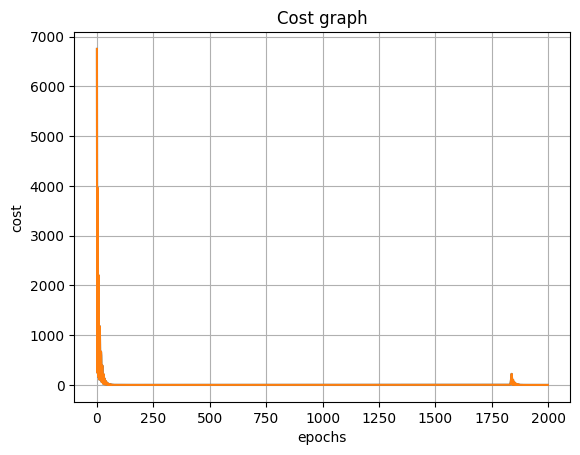


number of epochs:  500
learning rate =  0.1
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 499 , Cost: 2.296016


learning rate =  0.01
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 499 , Cost: 2.371821


learning rate =  0.001
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 499 , Cost: 118.081314


learning rate =  0.0001
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 499 , Cost: 1950.368896


learning rate =  1e-05
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.55566

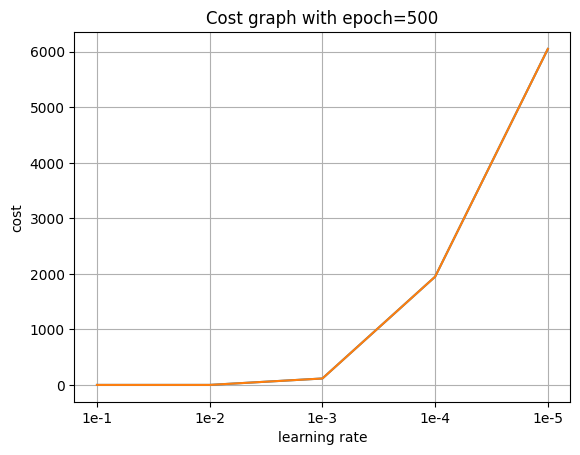


number of epochs:  1000
learning rate =  0.1
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 999 , Cost: 2.207389


learning rate =  0.01
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 999 , Cost: 2.344444


learning rate =  0.001
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 999 , Cost: 54.329464


learning rate =  0.0001
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 999 , Cost: 458.023285


learning rate =  1e-05
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664

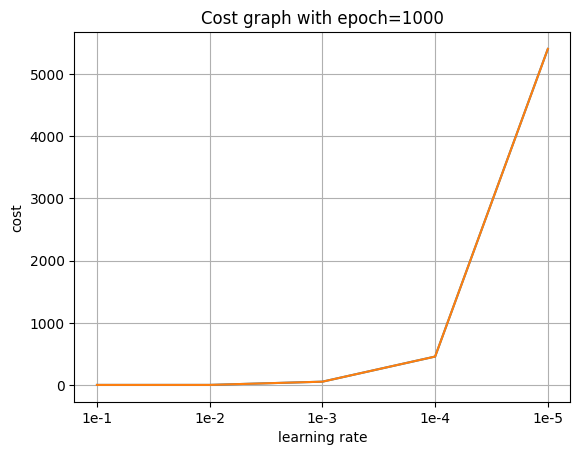


number of epochs:  2000
learning rate =  0.1
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 1999 , Cost: 2.124164


learning rate =  0.01
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 1999 , Cost: 2.294983


learning rate =  0.001
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 1999 , Cost: 5.574156


learning rate =  0.0001
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 1999 , Cost: 156.690857


learning rate =  1e-05
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555

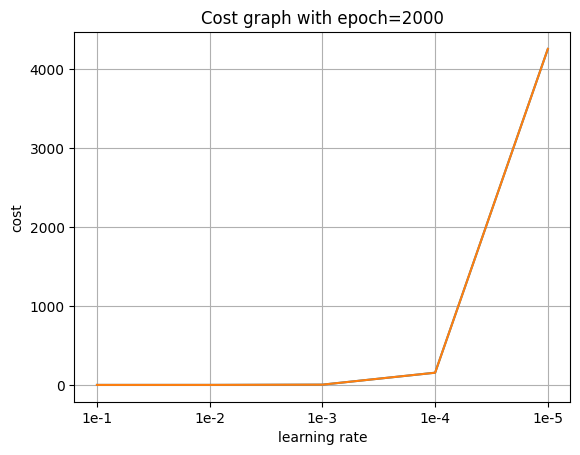


number of epochs:  5000
learning rate =  0.1
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 4999 , Cost: 11.967982


learning rate =  0.01
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 4999 , Cost: 2.136908


learning rate =  0.001
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 4999 , Cost: 2.343204


learning rate =  0.0001
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555664
Epoch: 4999 , Cost: 79.558258


learning rate =  1e-05
W =  tensor([[0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 6751.555

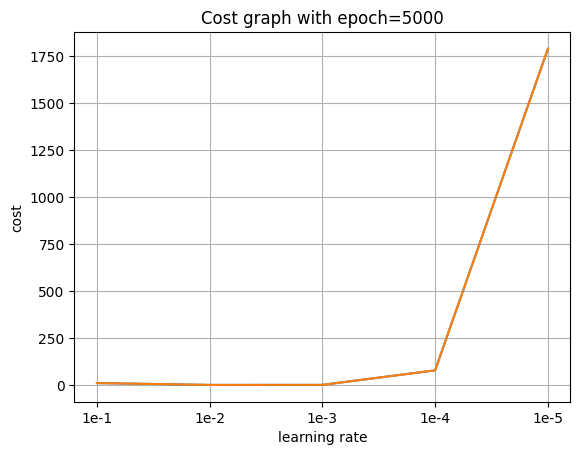

In [72]:
num_epochs = 1000
results = []

def draw_plot(data, epoch, opt):
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.plot(data)
  if opt == 0:
    ax.plot(history)
    plt.title('Cost graph')
    plt.xlabel('epochs')
  else:
    ax.plot(results)
    plt.title(f'Cost graph with epoch={epoch}')
    plt.xlabel('learning rate')
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels(['1e-1', '1e-2', '1e-3', '1e-4', '1e-5'])
  plt.ylabel('cost')
  ax.grid()
  plt.show()


draw_plot(history, 1000, 0)

learning_rates = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
num_epochs = [500, 1000, 2000, 5000]

for num_epoch in num_epochs:
  print("\nnumber of epochs: ", num_epoch)
  results=[]
  for i in learning_rates:
    W, b = weight_bias_reset() # Initialize weight and bias every epoch
    learning(optim.Adam([W, b], lr = i), i, num_epoch, W, b, 1)

  draw_plot(results, num_epoch, 1)


tensor([3.8000, 3.2000, 3.7000, 4.2000, 2.6000, 3.4000, 4.1000, 3.3000, 3.9000])
tensor([80., 90., 70., 50., 90., 30., 70., 60., 80.])
tensor([85., 80., 78., 87., 85., 70., 81., 88., 84.])


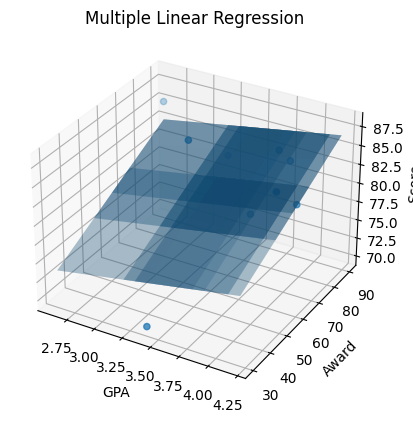

In [73]:
gpa = x_train[:, 0]
award = x_train[:, 2]
z = y_train.squeeze()
print(gpa)
print(award)
print(z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gpa, award, z)

A = np.vstack([gpa, award, np.ones_like(gpa)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

# Create a meshgrid for the plane
x_plane, y_plane = np.meshgrid(gpa, award)
z_plane = plane_coef[0] * x_plane + plane_coef[1] * y_plane + plane_coef[2]

# Add the regression plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.1)

# Add labels and title
ax.set_xlabel('GPA')
ax.set_ylabel('Award')
ax.set_zlabel('Score')
plt.title('Multiple Linear Regression')
plt.show()